# Lesson 0017 - MNIST Classification Deep Neural Network (III)
In this lesson, we will revisit the MNIST data set.<br>
We will try to make the network from [lesson 0016](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0016_mnist_classification_deep_neural_network_2.ipynb) deeper, therefore, we can steal lots of code from there.<br>
Please note, that I upgraded to [Tensorflow GPU](https://www.tensorflow.org/install/gpu). The computations might take a while if you do not employ a GPU.

In [1]:
import tensorflow as tf

tf.set_random_seed( 1234567890 )

print( tf.__version__ )

1.13.1


In [2]:
( train_x, train_y ),( test_x, test_y ) = tf.keras.datasets.mnist.load_data()

In [3]:
import numpy as np

np.random.seed( 1234567890 )

print( np.__version__ )

1.16.2


In [4]:
import matplotlib
import matplotlib.pyplot as plt

print( matplotlib.__version__ )

3.0.3


In [5]:
mu = np.mean( train_x )

sigma = np.std( train_x )



train_x = ( train_x - mu ) / sigma

test_x = ( test_x - mu ) / sigma

In [6]:
train_x_f = np.zeros( shape = [ 60000, 28 * 28 ] )

train_y_f = np.zeros( shape = [ 60000, 10 ] )

test_x_f = np.zeros( shape = [ 10000, 28 * 28 ] )

test_y_f = np.zeros( shape = [ 10000, 10 ] )




for i in range( 60000 ):
    
    train_y_f[ i, train_y[ i ] ] = 1.0
    
    
for i in range( 10000 ):
    
    test_y_f[ i, test_y[ i ] ] = 1.0
    

for i in range( 60000 ):
    
    dummy = np.array( train_x[ i ] )
    
    train_x_f[ i, : ] = dummy.flatten()
    
    
for i in range( 10000 ):
    
    dummy = np.array( test_x[ i ] )
    
    test_x_f[ i ] = dummy.flatten()
    
    
    
    
train_x = train_x_f

train_y = train_y_f

test_x = test_x_f

test_y = test_y_f

Now, we steal the code from [lesson 0016](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0016_mnist_classification_deep_neural_network_2.ipynb) to create the neural network.<br>
We will extend the approach from there by adding an additional layer of $256$ nodes before the output layer.<br>
We will train this model for $50000$ iterations on $100$ randomly drawn training data with a learning rate of $0.0001$.

In [7]:
x_tf = tf.placeholder( tf.float32, shape = [ None, 28 * 28 ] )

y_tf = tf.placeholder( tf.float32, shape = [ None, 10 ] )




W_tf_1 = tf.Variable( tf.truncated_normal( [ 28 * 28, 28 * 28 ] ) )

b_tf_1 = tf.Variable( tf.truncated_normal( [ 28 * 28 ] ) )

layer_2 = tf.nn.leaky_relu( tf.matmul( x_tf, W_tf_1 ) + b_tf_1 )




W_tf_2 = tf.Variable( tf.truncated_normal( [ 28 * 28, 512 ] ) )

b_tf_2 = tf.Variable( tf.truncated_normal( [ 512 ] ) )

layer_3 = tf.nn.leaky_relu( tf.matmul( layer_2, W_tf_2 ) + b_tf_2 )




W_tf_3 = tf.Variable( tf.truncated_normal( [ 512, 256 ] ) )

b_tf_3 = tf.Variable( tf.truncated_normal( [ 256 ] ) )

layer_4 = tf.nn.leaky_relu( tf.matmul( layer_3, W_tf_3 ) + b_tf_3 )




W_tf_4 = tf.Variable( tf.truncated_normal( [ 256, 10 ] ) )

b_tf_4 = tf.Variable( tf.truncated_normal( [ 10 ] ) )

output = tf.nn.leaky_relu( tf.matmul( layer_4, W_tf_4 ) + b_tf_4 )




cross_entropy = tf.reduce_mean( tf.nn.softmax_cross_entropy_with_logits_v2( logits = output, labels = y_tf ) )




gd = tf.train.GradientDescentOptimizer( 0.0001 ).minimize( cross_entropy )



hit = tf.equal( tf.argmax( output, 1 ), tf.argmax( y_tf, 1 ) )



accuracy = 100 * tf.reduce_mean( tf.cast( hit, tf.float32 ) )

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
sess = tf.Session()





progress_train = []

progress_train_current = []

progress_test = []
 
    
    
    
    
sess.run( tf.global_variables_initializer() )






for i in range( 50000 ):
                
    random_integers = np.random.choice( range( 60000 ), 100, replace = False )
                
    local_x = train_x[ random_integers, : ]
    
    local_y = train_y[ random_integers, : ]
        
    sess.run( gd, feed_dict = { x_tf : local_x, y_tf : local_y } )
        
    progress_train.append( sess.run( accuracy, feed_dict = { x_tf : train_x, y_tf : train_y } ) )
        
    progress_train_current.append( sess.run( accuracy, feed_dict = { x_tf : local_x, y_tf : local_y } ) )
        
    progress_test.append( sess.run( accuracy, feed_dict = { x_tf : test_x, y_tf : test_y } ) )

In [9]:
sess.close()

Text(0, 0.5, 'Accuracy (%)')

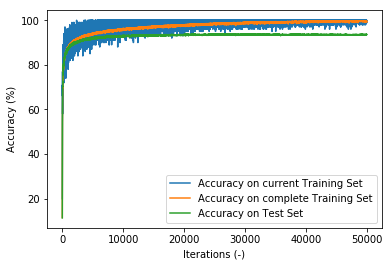

In [10]:
plt.plot( progress_train_current, label = 'Accuracy on current Training Set' )

plt.plot( progress_train, label = 'Accuracy on complete Training Set' )

plt.plot( progress_test, label = 'Accuracy on Test Set' )

plt.legend( loc = 'best' )

plt.xlabel( 'Iterations (-)' )

plt.ylabel( 'Accuracy (%)' )

Text(0, 0.5, 'Accuracy on Test Set (%)')

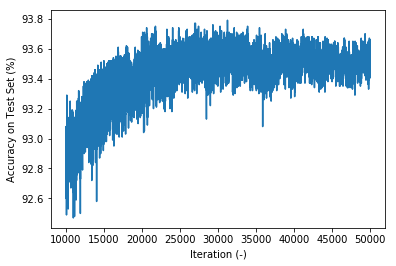

In [11]:
plt.plot( range( 10000, 50000 ), progress_test[ 10000 : 50000 ] )

plt.xlabel( "Iteration (-)" )

plt.ylabel( "Accuracy on Test Set (%)" )

When we compare the performance of this model with the performance of the model from [lesson 0016](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0016_mnist_classification_deep_neural_network_2.ipynb), we notice, that this model performs slightly worse than the model from [lesson 0016](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0016_mnist_classification_deep_neural_network_2.ipynb).<br>
Since the performance of this model on the training set is already nearly perfect, this model cannot improve anymore.<br>
Therefore, we realize, that adding this additional layer of $256$ nodes did not improve the performance of the model.<br>
For now, we must conclude, that the model from [lesson 0016](https://github.com/Mathhead/Lessons-in-Machine-Learning/blob/master/lesson_0016_mnist_classification_deep_neural_network_2.ipynb) is the best model we can train using a normal deep neural network architecture. Therefore<br>
Class dismissed.